<a href="https://colab.research.google.com/github/annagradziel12/statystyka/blob/master/01_statystyki_opisowe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statystyka opisowa

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats

## Statystyki próbkowe i metody opisu danych jakościowych

## Zadanie - podstawowe statystyki
Zaimplementować klasę `Stats`, która posiada metody do wyznaczenia:

a) średniej arytmetycznej,
b) mediany,
c) wariancji,
d) odchylenia standardowego


dla dowolnej danych $X$.

In [ ]:
?np.var

In [ ]:
class Stats:
    
    def __init__(self, vec):
        self.vec = vec
    
    def mean(self):
        return np.mean(self.vec)
    
    def median(self):
        return np.median(self.vec)
    
    def var(self):
        return np.var(self.vec, ddof=1)
    # ``N - ddof``, where ``N`` represents the number of elements. By
    # default `ddof` is zero.
    
    def std(self):
        return np.std(self.vec, ddof=1)

In [ ]:
a = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

stats2 = Stats(a)

In [ ]:
print(stats2.mean())
print(stats2.median())
print(stats2.var())
print(stats2.std())

5.5
5.5
9.166666666666666
3.0276503540974917


## Zadanie - boxplot, szereg rozdzielczy, histogram
Firma budowlana zainteresowana jest jakością betonu. Jedną z pożądanych cech jest jego odpowiednia wytrzymałość na ściskanie. Aby sprawdzić, czy beton proponowany przez dostawcę spełnia normy jakości, przebadano 50 próbek i otrzymano następujące wyniki wytrzymałości na ściskanie:
6.2, 16.7, 25.5, 17.5, 14.4, 27.7, 13.2, 21.2, 21.7, 12.1, 11.7, 27.6, 22.3, 22.8, 14.2, 19.1, 22.7, 16.7, 25.2, 24.9, 13.6,  9.7, 18. , 17.9, 26.3, 17.7, 13.9, 17.7, 22.7, 16.7, 18.8, 19.5, 21.7, 21.5, 19. , 14.6, 24.6, 20.9, 20.7, 21. , 18.4, 15.3, 22.1, 26. ,25.4, 14.1, 18.1, 23. , 14.9, 27.3.

a) Obliczyć podstawowe statystyki próbkowe 

b) Sporządzić i opisać wykres skrzynkowy.

d) Zbudować szereg rozdzielczy (*dla chętnych*).

e) Narysować histogram liczności.

f) Narysować histogram skumulowanych liczności.

In [ ]:
beton = np.array([6.2, 16.7, 25.5, 17.5, 14.4, 27.7, 13.2, 21.2, 21.7, 
                   12.1, 11.7, 27.6, 22.3, 22.8, 14.2, 19.1, 22.7, 16.7, 
                   25.2, 24.9, 13.6,  9.7, 18. , 17.9, 26.3, 17.7, 13.9, 
                   17.7, 22.7, 16.7, 18.8, 19.5, 21.7, 21.5, 19. , 14.6, 
                   24.6, 20.9, 20.7, 21. , 18.4, 15.3, 22.1, 26. ,25.4, 
                   14.1, 18.1, 23. , 14.9, 27.3])

In [ ]:
beton_stats = Stats(beton)
print(beton_stats.mean())
print(beton_stats.median())

19.29
19.05


In [ ]:
pd.DataFrame(beton).describe()

,0
count,50.000000
mean,19.290000
std,4.953302
min,6.200000
25%,15.650000
50%,19.050000
75%,22.700000
max,27.700000


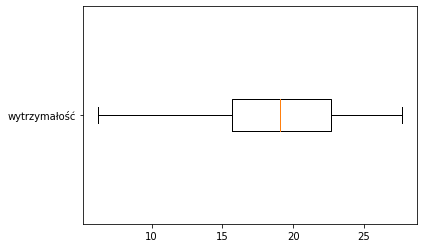

In [ ]:
plt.boxplot(beton, vert=False, labels=["wytrzymałość"])
plt.show()

In [ ]:
# c)
n = beton.size

# wyznaczamy liczbę klas
left_k = 0.75 * np.sqrt(n)
right_k = np.sqrt(n)
print(left_k, right_k) # => k = 6

5.303300858899107 7.0710678118654755


In [ ]:
k = 6

# wyznaczamy długośc klasy
bmin = beton.min()
bmax = beton.max()

d = np.round((bmax - bmin) / k, 2)
print(d)

3.58


In [ ]:
# wyznaczamy przedzialy klas
left_bound = np.round(np.arange(bmin, bmax, d)[:k], 2)

intervals = []
n_size = np.zeros(k)

# wyznaczamy szereg rozdzielczy
make_interval = lambda x, y: "[{}, {})".format(x, y)
make_closed_interval = lambda x, y: "[{}, {}]".format(x, y)

for i in range(k-1):
    l, r = left_bound[i], left_bound[i+1]
    intervals.append(make_interval(l, r))
    n_size[i] = np.sum((beton >= l) & (beton < r))
         
l, r = left_bound[k-1], bmax
intervals.append(make_closed_interval(l, r))
n_size[k-1] = np.sum((beton >= l) & (beton <= r))

f = n_size / beton.size
frequency_distribution = pd.DataFrame({'Interval': np.array(intervals), 
                                       'n': n_size, 'f': f, 
                                      'cn': np.cumsum(n_size), 'cf': np.cumsum(f)})
frequency_distribution

,Interval,n,f,cn,cf
0,"[6.2, 9.78)",2.0,0.04,2.0,0.04
1,"[9.78, 13.36)",3.0,0.06,5.0,0.10
2,"[13.36, 16.94)",11.0,0.22,16.0,0.32
3,"[16.94, 20.52)",11.0,0.22,27.0,0.54
4,"[20.52, 24.1)",13.0,0.26,40.0,0.80
5,"[24.1, 27.7]",10.0,0.20,50.0,1.00


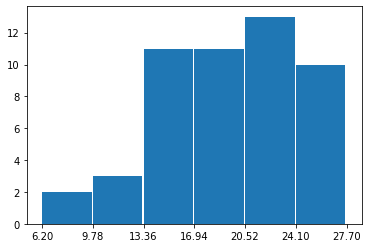

In [ ]:
# histogram
plt.hist(beton, bins=k, width=3.5)
plt.xticks(list(left_bound) + [bmax], rotation=0)
plt.show()

In [ ]:
# histogram skumulowanych liczności

In [ ]:
?plt.hist

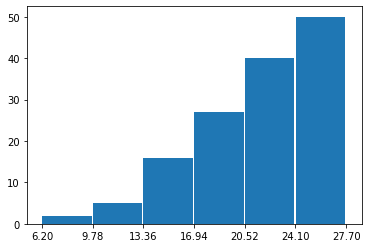

In [ ]:
plt.hist(beton, bins=k, width=3.5, cumulative=True)
plt.xticks(list(left_bound) + [bmax], rotation=0)
plt.show()

## Zadanie - porównanie średniej arytmetycznej i mediany
Wczytaj dane `stats1.csv` opisujące pomiar pewnej długości przez dwóch różnych ekspertów. Porównaj ich rozkład oraz statystyki próbkowe.

In [ ]:
stats1 = pd.read_csv('../data/stats1.csv')
stats1.head(5)

,x,y
0,10.968388,10.481487
1,11.035494,13.211230
2,3.805479,3.954873
3,3.402634,5.367647
4,7.527793,7.234025


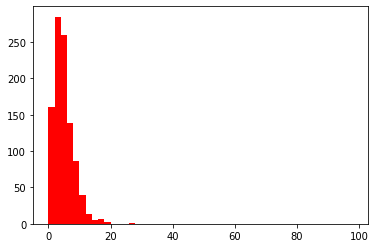

In [ ]:
plt.hist(stats1.x, bins=np.arange(0, 100, 2), color='r')
plt.show()

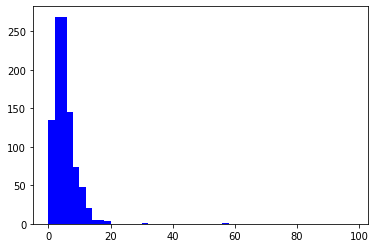

In [ ]:
plt.hist(stats1.y, bins=np.arange(0, 100, 2), color='b')
plt.show()

In [ ]:
stats1.describe()

,x,y
count,1000.000000,1000.000000
mean,4.956962,6.523673
std,3.165879,28.577406
min,0.289994,-1.198420
25%,2.660315,2.736644
50%,4.414328,4.530463
75%,6.575814,6.822966
max,27.866537,808.876344


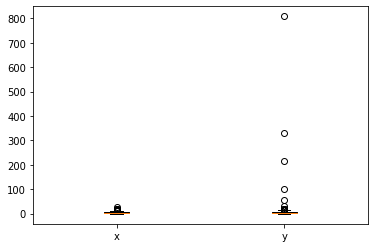

In [ ]:
plt.boxplot([stats1.x, stats1.y], labels=['x', 'y'])
plt.show()

In [ ]:
stats1.y[np.where(stats1.y > np.quantile(stats1.y, 0.99))[0]]

103     30.095229
158    808.876344
240     17.864930
323     18.376594
380     99.305207
467     56.603880
524     18.773622
592    214.653314
658     18.098880
699    329.789401
Name: y, dtype: float64

In [ ]:
stats1.x[np.where(stats1.x > np.quantile(stats1.x, 0.99))[0]]

103    27.866537
240    18.567657
323    18.175175
357    16.665207
428    16.983643
503    16.255930
524    17.507817
658    17.966354
687    16.704449
892    16.168756
Name: x, dtype: float64

**Wnioski:** 
- **średnia artymetyczna**:
    + bierze pod uwagę całą próbę
    - bardzo wrażliwa na wpływ obserwacji odstających, zwanych też outlierami - obserwacje odstające, to te wartości w próbie, które są bardzo małe albo bardzo duże w stosunku do ogółu obserwacji (najczęściej, choć nie zawsze, outliery są rezultatem błędów grubych, stąd też należy być bardzo ostrożnym przy wyciąganiu wniosków na podstawie próby zawierającej obserwacje odstające).
- **mediana**:
    + całkowicie odporna na wpływ obserwacji odstających, bowiem wyznaczana jest na podstawie środkowych wartości w próbie i ignoruje całkowicie wartości ekstremalne.

## Zadanie - współczynnik rozproszenia
Wczytaj dane `stats2.csv` zawierające pomiary wagi słoni i myszy w pewnym zoo (w gramach). Wyznacz statystyki próbkowe i oceń, która próbka, opisująca wagę słoni, czy opisująca wagę myszy, ma większe rozproszenie wartości.

In [ ]:
weight = pd.read_csv('../data/stats2.csv')
weight.head(5)

,elephant,mouse
0,3883240.0,21.0
1,4046450.0,18.0
2,4152119.0,22.0
3,2578306.0,23.0
4,3597481.0,25.0


In [ ]:
s = weight.describe()
s

,elephant,mouse
count,1.000000e+02,100.000000
mean,4.017328e+06,20.470000
std,4.998078e+05,2.886594
min,2.578306e+06,13.000000
25%,3.685120e+06,19.000000
50%,4.046994e+06,20.000000
75%,4.380402e+06,22.000000
max,5.246947e+06,27.000000


**Uwaga**: W sytuacji, gdy chcemy porównanć rozrzut dwóch lub więcej prób, nieraz wygodniej jest skorzystać ze względnej miary rozproszenia - **współczynnika rozproszenia**:
$$
V = \frac{S}{\overline{X}}\cdot 100\%.
$$


In [ ]:
s.loc['std'] / s.loc['mean'] * 100

elephant    12.441300
mouse       14.101582
dtype: float64

## Miara korelacji — współczynnik korelacji Pearsona

W przypadku jednoczesnego badania dwóch cech pewnej populacji naszą próbą jest ciąg par $$(X_1, Y_1),\ldots,(X_n, Y_n),$$ gdzie $X_i$ oraz $Y_i$ oznaczają, odpowiednio, wartości pierwszej i drugiej cechy przyjmowane przez $i$-ty element próby.

Wówczas **współczynnik korelacji Pearsona** jest dany wzorem
\begin{equation*}
    r = \frac{\sum_{i=1}^n(X_i-\overline{X})(Y_i-\overline{Y})}{\sqrt{\sum_{i=1}^n(X_i-\overline{X})^2\sum_{i=1}^n(Y_i-\overline{Y})^2}}.
\end{equation*}

In [ ]:
?np.corrcoef

## Zadanie - korelacja liniowa
Wygeneruj próbkę $X$ z wybranego przez siebie rozkładu i oblicz wartość elementów próbki $Y$ zgodnie ze wzorem

a) $Y = X$,

b) $Y = 5X$,

c) $Y = -5X$,

d) $Y = X^2$,

f) $Y = \exp(X)$,

g) $Y = \sin(X)$, 

a następnie oblicz współczynnik korelacji pomiędzy zmiennymi $X$ i $Y$.

In [ ]:
f1 = lambda a, x: a * x
f2 = lambda a, x: x ** a
f3 = lambda x: np.exp(x)
f4 = lambda x: np.sin(x)

In [ ]:
x = stats.norm.rvs(size=10000, loc=0, scale=1)

ya = f1(1, x)
yb = f1(5, x)
yc = f1(-5, x)
yd = f2(2, x)
yf = f3(x)
yg = f4(x)

In [ ]:
np.round(np.corrcoef(x, yd)[0, 1], 5)

0.00407

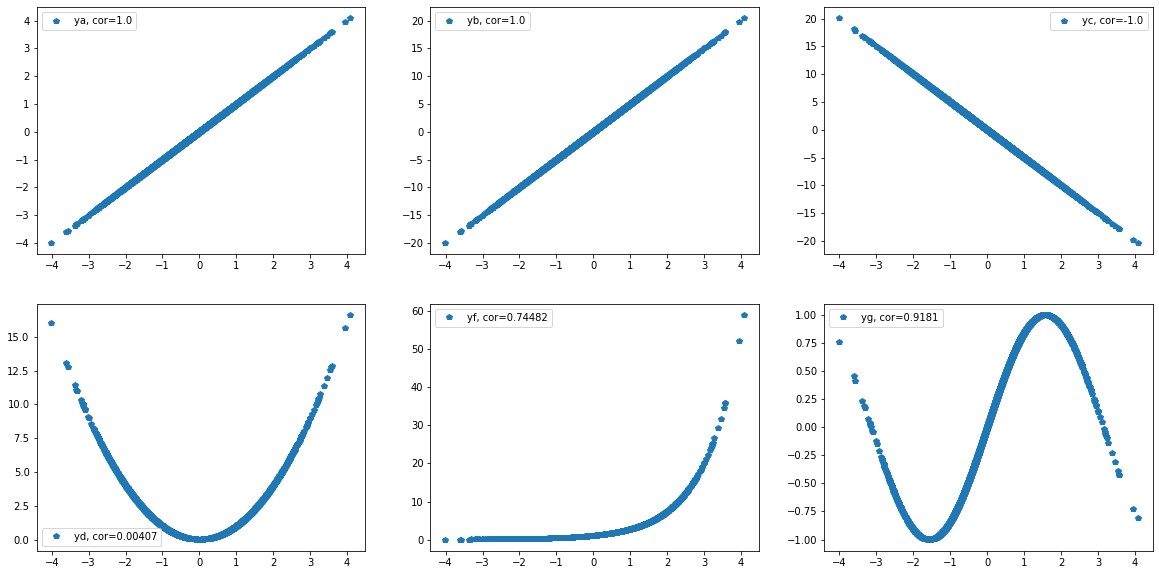

In [ ]:
fig, ax = plt.subplots(2, 3, figsize=(20, 10))
ax[0, 0].plot(x, ya, "p", label="ya, cor={}".format(np.round(np.corrcoef(x, ya)[0, 1], 5)))
ax[0, 0].legend(loc="best")

ax[0, 1].plot(x, yb, "p", label="yb, cor={}".format(np.round(np.corrcoef(x, yb)[0, 1], 5)))
ax[0, 1].legend(loc="best")

ax[0, 2].plot(x, yc, "p", label="yc, cor={}".format(np.round(np.corrcoef(x, yc)[0, 1], 5)))
ax[0, 2].legend(loc="best")

ax[1, 0].plot(x, yd, "p", label="yd, cor={}".format(np.round(np.corrcoef(x, yd)[0, 1], 5)))
ax[1, 0].legend(loc="best")

ax[1, 1].plot(x, yf, "p", label="yf, cor={}".format(np.round(np.corrcoef(x, yf)[0, 1], 5)))
ax[1, 1].legend(loc="best")

ax[1, 2].plot(x, yg, "p", label="yg, cor={}".format(np.round(np.corrcoef(x, yg)[0, 1], 5)))
ax[1, 2].legend(loc="best")

**Wniosek**:
- zerowa korelacja nie oznacza braku zależności, np. związek $y=x^2$.

## Zadanie - korelacja liniowa
Wygeneruj $n$ par niezależnych zmiennych losowych, dla każdej z nich wyznacz współczynnik korelacji, a następnie sprawdź rozkład otrzymanych współczynników.

In [ ]:
N = 1000 # powtarzamy eksperyment 1000
n = 100 # probka licznosci 100

cor = np.zeros(N)

for i in range(N):
    x = stats.norm.rvs(size=n, loc=0, scale=1)
    y = stats.uniform.rvs(size=n, loc=-2, scale=4)
    cor[i] = np.corrcoef(x, y)[0, 1]

In [ ]:
pd.DataFrame(cor).describe()

,0
count,1000.000000
mean,0.005363
std,0.099742
min,-0.312933
25%,-0.059776
50%,0.002248
75%,0.070684
max,0.297089


**Wniosek**: Niezależne zmienne losowe moga mieć niezerową korelację.

## Zadanie
Wczytaj zbiór danych `boston_prediction.csv`, który zawiera dane z predykcji dwóch modeli cen mieszkań w Bostonie (więcej na temat zbioru, na podstawie, którego zbudowano modele możesz przeczytać, np. https://stat.ethz.ch/R-manual/R-devel/library/MASS/html/Boston.html).

Oceń jakość predykcji obu modeli: policz średnią, medianę, kwartyl rzędu 90% oraz odchylenie standardowe dla błędu bezwzględnego i względnego oraz korelację wartości przewidywanych z prawdziwymi. Wyciągnąć wnioski na temat działania obu modeli.

**Wskazówka**:

**Błąd bezwzględny** liczymy ze wzoru:
$$
\Delta x = |x-x_0|.
$$

**Błąd względny** liczymy ze wzoru:
$$
\delta = \frac{\Delta x}{x}.
$$

Oznaczenia: $x$ - wartość dokładna, $x_0$ - wartość zmierzona.

In [ ]:
# https://stat.ethz.ch/R-manual/R-devel/library/MASS/html/Boston.html
from sklearn.datasets import load_boston
X, y = load_boston(return_X_y=True)

In [ ]:
boston_pred = pd.read_csv("../data/boston_prediction.csv")
boston_pred.head(5)

,price,model_pred,model_pred2
0,24.0,30.0,27.4
1,21.6,25.0,21.7
2,34.7,30.6,33.7
3,33.4,28.6,33.7
4,36.2,27.9,33.7


In [ ]:
boston_pred.describe()

,price,model_pred,model_pred2
count,506.000000,506.000000,506.000000
mean,22.532806,22.532016,22.539921
std,9.197104,7.913610,8.258947
min,5.000000,-4.300000,12.000000
25%,17.025000,17.425000,17.100000
50%,21.200000,22.100000,21.700000
75%,25.000000,27.400000,27.400000
max,50.000000,44.700000,45.100000


In [ ]:
np.quantile(boston_pred, q=0.90, axis=0)

array([34.8, 33.3, 33.7])

In [ ]:
# bledy bezwgledne

In [ ]:
np.std(np.abs(boston_pred.price - boston_pred.model_pred), ddof=1)

3.349464654830097

In [ ]:
np.std(np.abs(boston_pred.price - boston_pred.model_pred2), ddof=1)

2.791766747074344

In [ ]:
# bledy wzgledne 

In [ ]:
np.std(np.abs(boston_pred.price - boston_pred.model_pred) / boston_pred.price, ddof=1)

0.18546959252120954

In [ ]:
np.std(np.abs(boston_pred.price - boston_pred.model_pred2) / boston_pred.price, ddof=1)

0.19345466569108838

In [ ]:
# korelacja

In [ ]:
np.corrcoef(boston_pred.price, boston_pred.model_pred)[0, 1]

0.8606612985241783

In [ ]:
np.corrcoef(boston_pred.price, boston_pred.model_pred2)[0, 1]

0.8986422163603659